#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem
# sameera@uio.no - Sameer Ahmed



## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 23 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


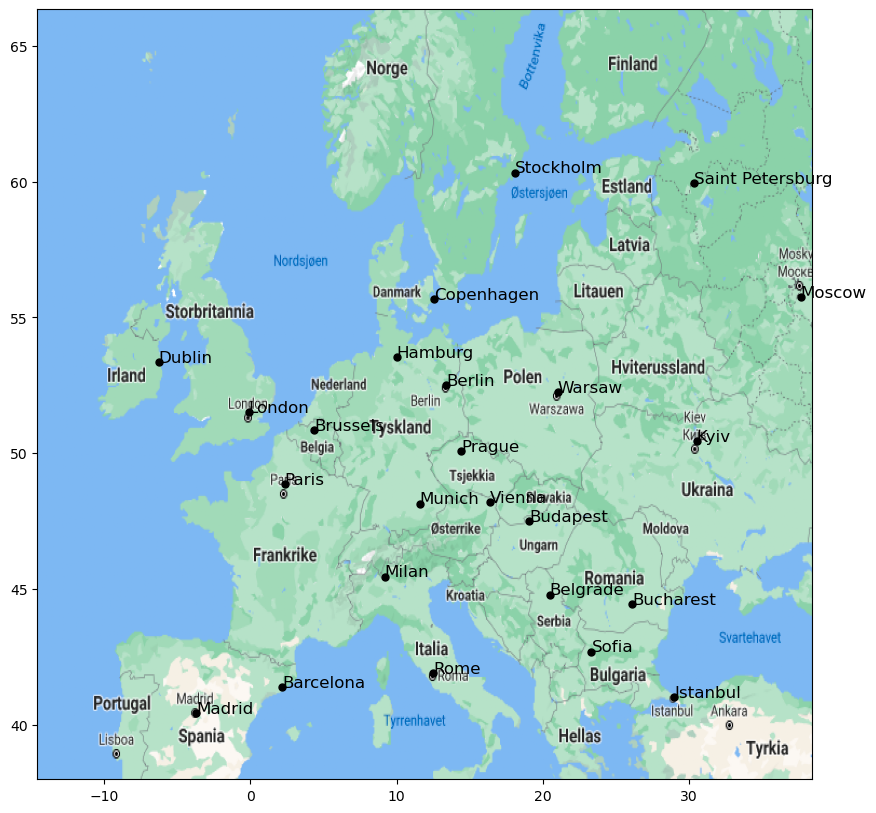

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


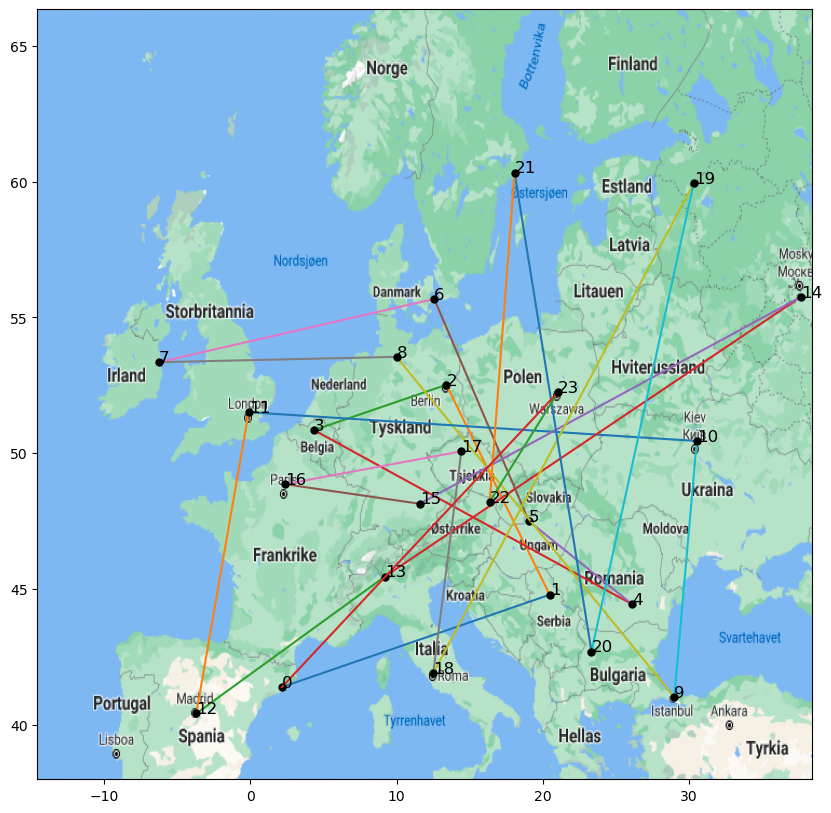

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

total distance for 6 cities is 5018.8099999999995 km . Time was 0.0006470680236816406 s


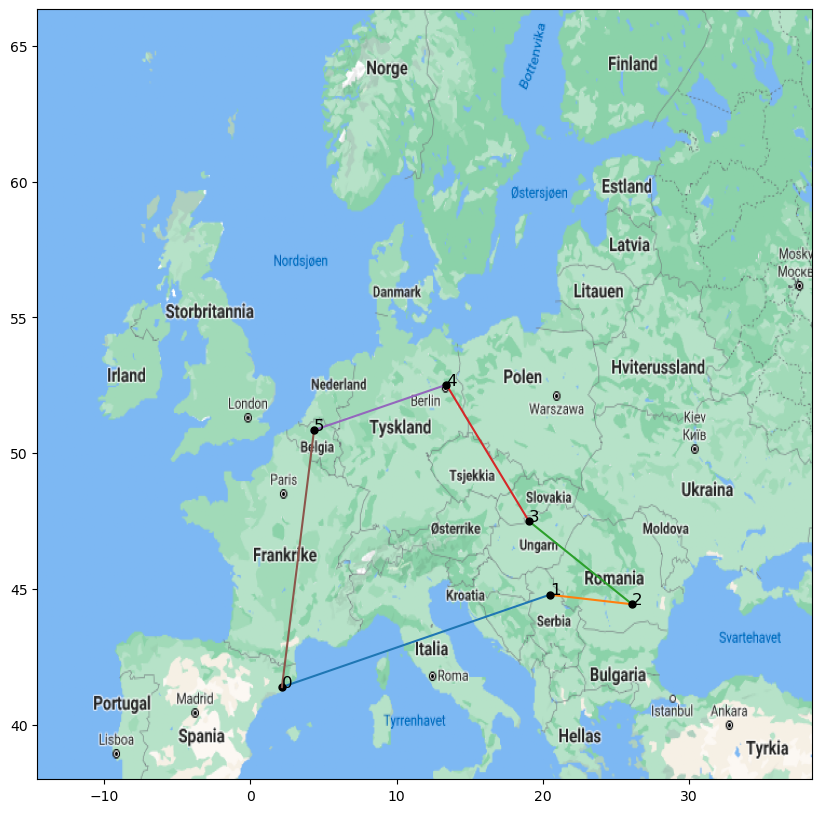

Time was 0.006420135498046875 s for 7 cities
Time was 0.05388998985290527 s for 8 cities
Time was 0.5244140625 s for 9 cities
total distance for 10 cities is 7486.309999999999 km . Time was 4.863009929656982 s
('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')


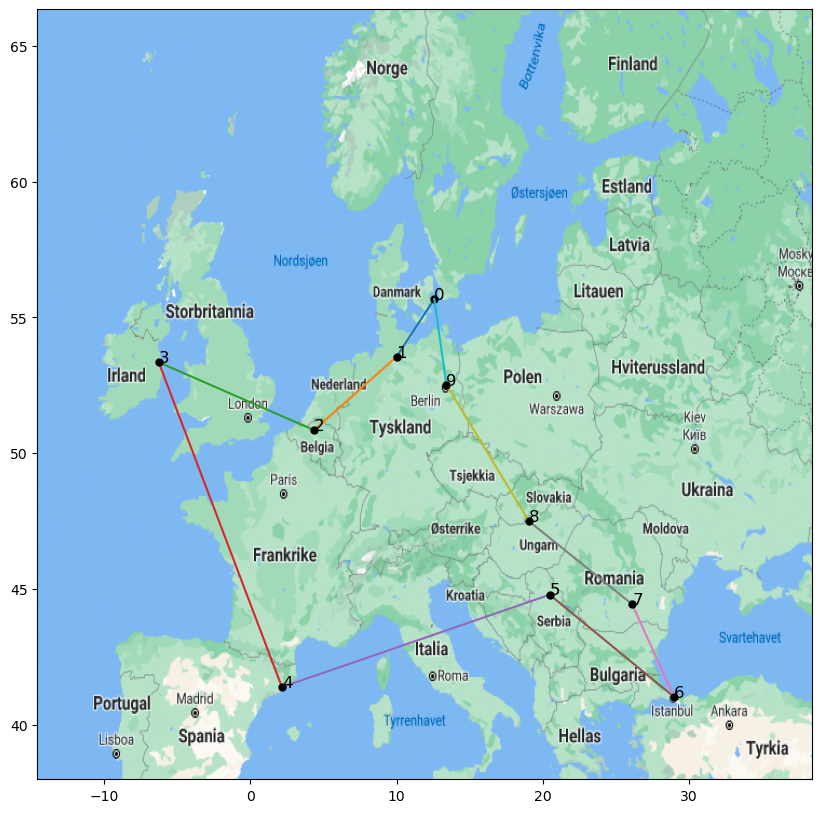

In [13]:
# Implement the algorithm here
import itertools
import time

#change the data so it is easier to work with
def parse_distances(data):
    city_names = data[0]
    distances = {}
    for i, row in enumerate(data[1:]):
        city_from = city_names[i]
        distances_to = {}

        for j, distance_str in enumerate(row):
            city_to = city_names[j]
            distance = float(distance_str)
            distances_to[city_to] = distance

        distances[city_from] = distances_to

    return distances

#find total distance for a tour 
def total_distance(tour, distances):
    total_dist = 0

    for i in range(len(tour) - 1):
        current_city = tour[i]
        next_city = tour[i + 1]
        total_dist += distances[current_city][next_city]
    
    last_city = tour[-1]
    first_city = tour[0]

    total_dist += distances[last_city][first_city]
    return total_dist

#Loops through all the permaunations and saves the shortest one
def exhaustiveSearch(distances, n):
    names = list(distances.keys())[:n]
    all_tours = itertools.permutations(names)

    best_distance = total_distance(names,distances)
    best_tour = []

    for tour in all_tours:
        current_distance = total_distance(tour, distances)
        if current_distance < best_distance:
            best_distance = current_distance
            best_tour = tour

    return best_tour


dis = parse_distances(data)

start = time.time()
Shortes6= exhaustiveSearch(dis, 6)
end = time.time()
print("total distance for 6 cities is", total_distance(Shortes6, dis), "km . Time was", (end-start), "s")
plot_plan(Shortes6)


start = time.time()
Shortes7= exhaustiveSearch(dis, 7)
end = time.time()
print("Time was", (end-start), "s for 7 cities")


start = time.time()
Shortes8= exhaustiveSearch(dis, 8)
end = time.time()
print("Time was", (end-start), "s for 8 cities")

start = time.time()
Shortes8= exhaustiveSearch(dis, 9)
end = time.time()
print("Time was", (end-start), "s for 9 cities")

Shortes10= exhaustiveSearch(dis, 10)

start = time.time()
Shortes10= exhaustiveSearch(dis, 10)
end = time.time()
print("total distance for 10 cities is", total_distance(Shortes10, dis), "km . Time was", (end-start), "s")
print(Shortes10)
plot_plan(Shortes10)

In [6]:
# From the output you can see that the time increases significantly if we add more cities (n). 
#This is because we test every possibility which is n factorial (!).

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [7]:
# Answer
#My shortest tour with 10 cities is 7486.309999999999 km. The sequence is; 
#Copenhagen - Hamburg - Brussels - Dublin - Barcelona - Belgrade - Istanbul - Bucharest - Budapest - Berlin- And back to Copenhagen
#It took the program 4.86 seconds. 
# To find the shortest path with all the 24 cities it would take 4.86 * 24!/10! which is around 26,33 billion years


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

Best for 10 cities: 7486.3099999999995
Worst for 10 cities: 8407.18
Mean for 10 cities: 7759.4635
Standard Deviation for 10 cities: 338.00590950862096


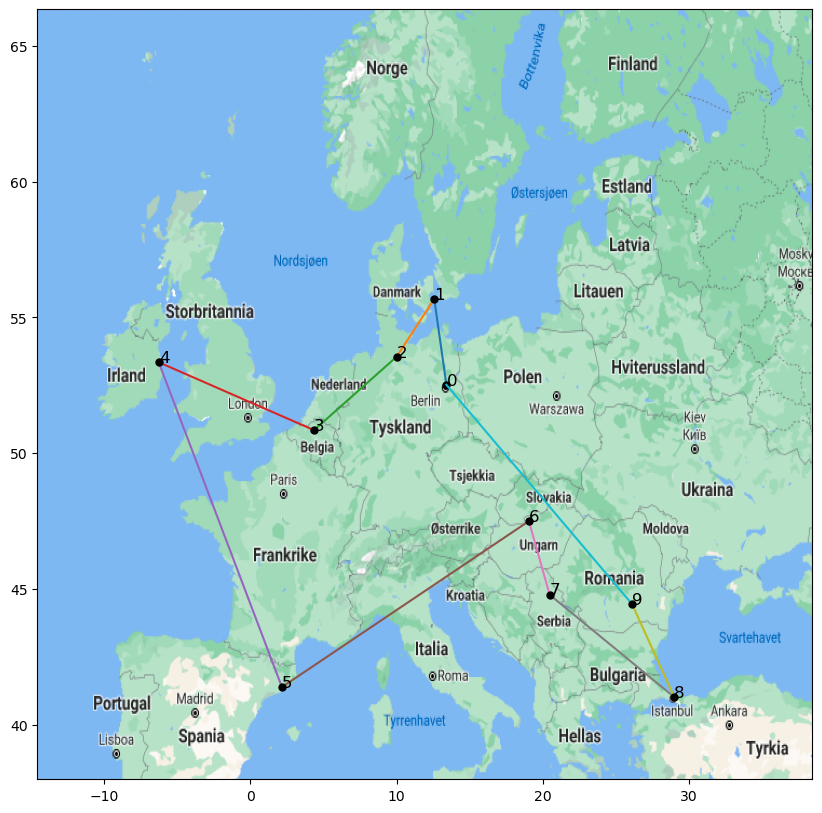

Best for all 24 cities: 13919.940000000004
Worst for all 24 cities: 16274.470000000001
Mean for all 24 cities: 14976.485499999999
Standard Deviation for all 24 cities: 706.3265838510893


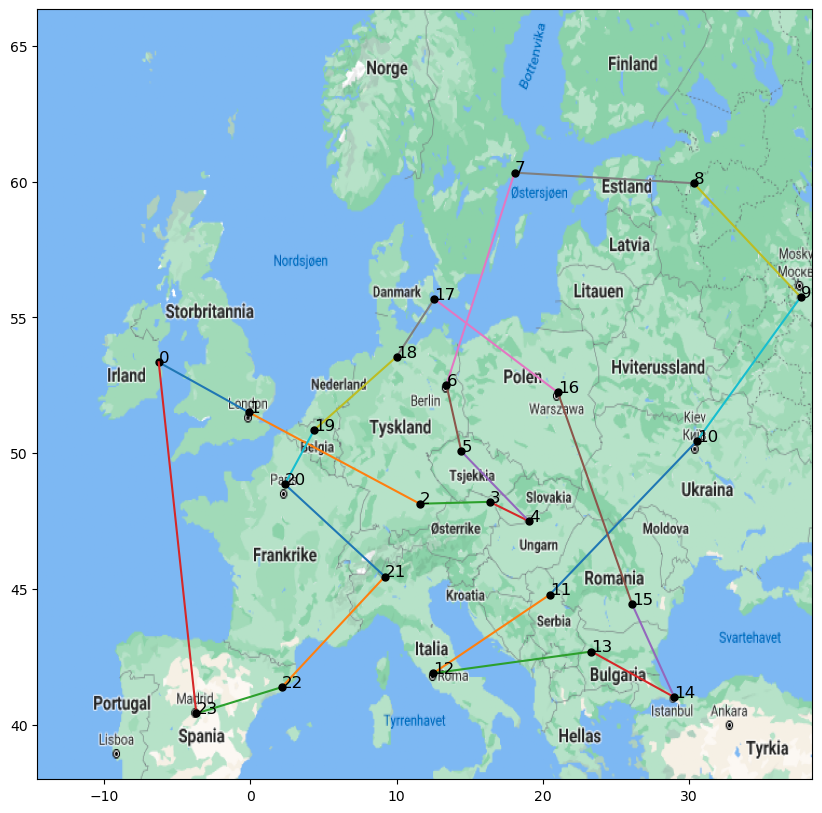

In [8]:
# Implement the algorithm here

#choses 2 randoms cities and swaps them
def HillClimbing(distances,n):
    FoundTours=[]

    names = list(distances.keys())[:n]
    #start with a random tour
    np.random.shuffle(names)
    start_distance=total_distance(names,distances)

    for i in range(1000):
        FoundTours.append(start_distance)
    
        city1= np.random.choice(np.arange(len(names)))
        city2= np.random.choice(np.arange(len(names)))
        
        if city1 != city2:
            new_tour = names.copy()
            swap =  new_tour[city1]
            new_tour[city1] = new_tour[city2]
            new_tour[city2] = swap

            new_distance=total_distance(new_tour,distances)

            if new_distance<start_distance:
                start_distance=new_distance
                names=new_tour

    return names, start_distance

def analyze_results(results):
    #extract just the distances for analysis
    distanceLst = [distance for _, distance in results]
    distanceLst.sort()
    #calculate statistics
    best = distanceLst[0]
    worst = distanceLst[-1]
    mean_distance = np.mean(distanceLst)
    std_dev = np.std(distanceLst)
    
    return best, worst, mean_distance, std_dev


results10 = []
for _ in range(20):
    route, distance = HillClimbing(dis, 10)
    results10.append((route, distance))

best10, worst10, mean10, std_dev10 = analyze_results(results10)

print("Best for 10 cities:", best10)
print("Worst for 10 cities:", worst10)
print("Mean for 10 cities:", mean10)
print("Standard Deviation for 10 cities:" , std_dev10)
plot_plan(results10[-1][0])  # Plotting the best tour for 10 cities


results24 = []
for _ in range(20):
    route, distance = HillClimbing(dis, 24)
    results24.append((route, distance))

best24, worst24, mean24, std_dev24 = analyze_results(results24)
print("Best for all 24 cities:", best24)
print("Worst for all 24 cities:", worst24)
print("Mean for all 24 cities:", mean24)
print("Standard Deviation for all 24 cities:" , std_dev24)
plot_plan(results24[-1][0])  # Plotting the best tour for 10 cities

How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**?


In [9]:
#The hill climber preforms well, as you can see from the 20 runs it get the optimal route for 10 cities.
#the average is also quite good. But the worst we get is far off from the exhaustive search.


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

average time was 0.06378679275512696
Best for 10 cities: 7486.3099999999995
Worst for 10 cities: 7680.299999999999
Mean for 10 cities: 7496.848999999999
Standard Deviation for 10 cities: 42.244889501571556


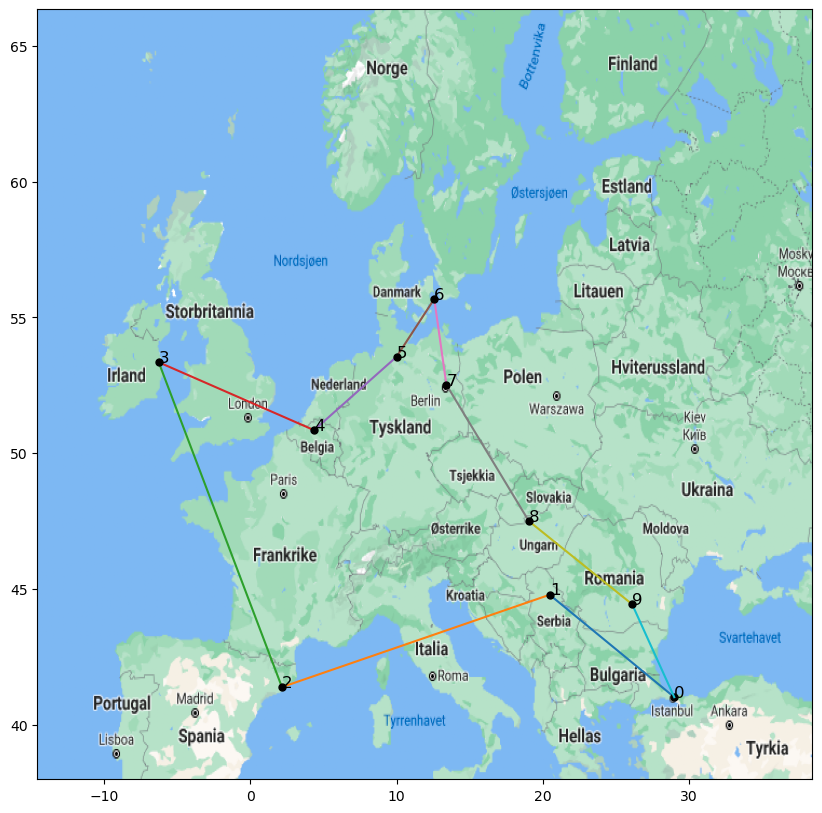


Population 50:
average time was 0.09550776481628417
Best for 24 cities: 13224.519999999999
Worst for 24 cities: 17471.04
Mean for 24 cities: 14882.6785
Standard Deviation for 24 cities: 1024.9633439068687


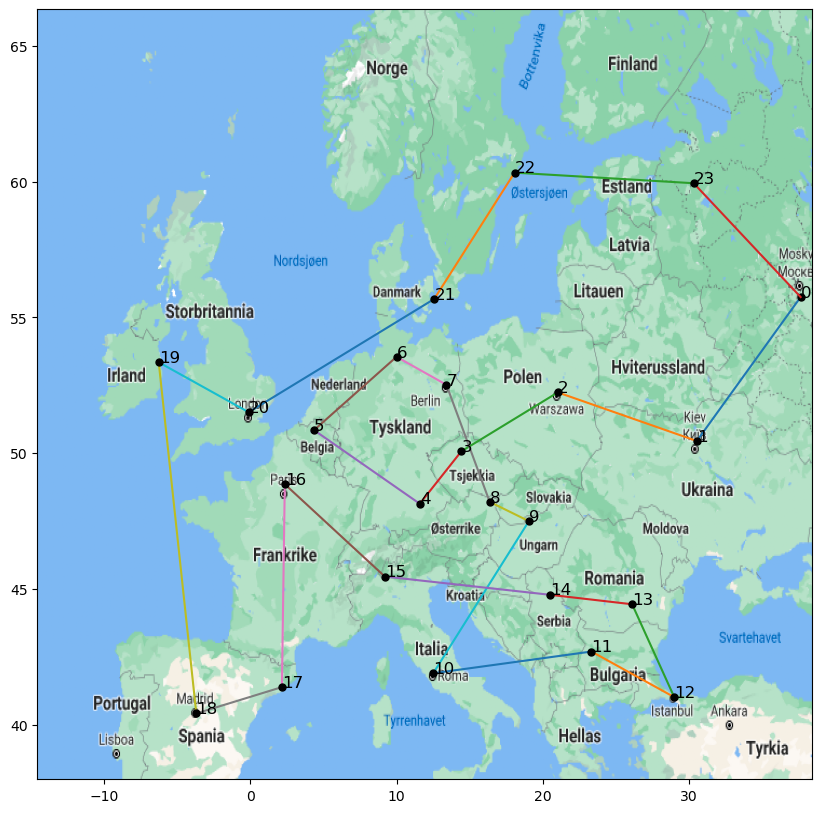


Population 100:
average time was 0.17613929510116577
Best for 24 cities: 12605.08
Worst for 24 cities: 16191.089999999997
Mean for 24 cities: 13990.259500000004
Standard Deviation for 24 cities: 803.9671114695856


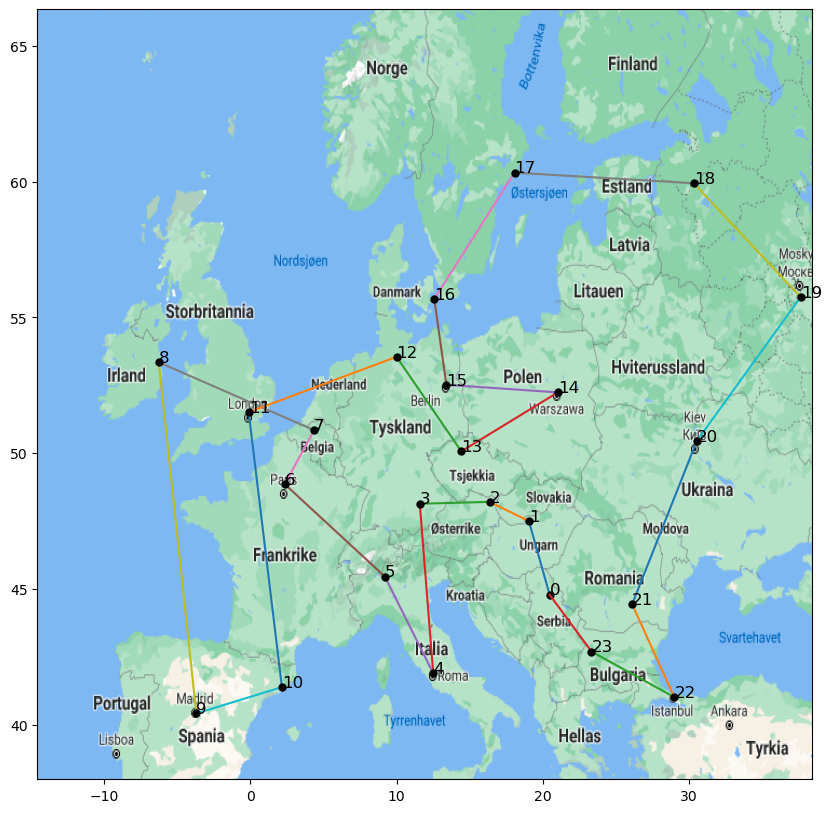

Population 200:
average time was 0.18335341215133666
Best for 24 cities: 12874.35
Worst for 24 cities: 15996.32
Mean for 24 cities: 14116.613000000001
Standard Deviation for 24 cities: 794.7414054716165


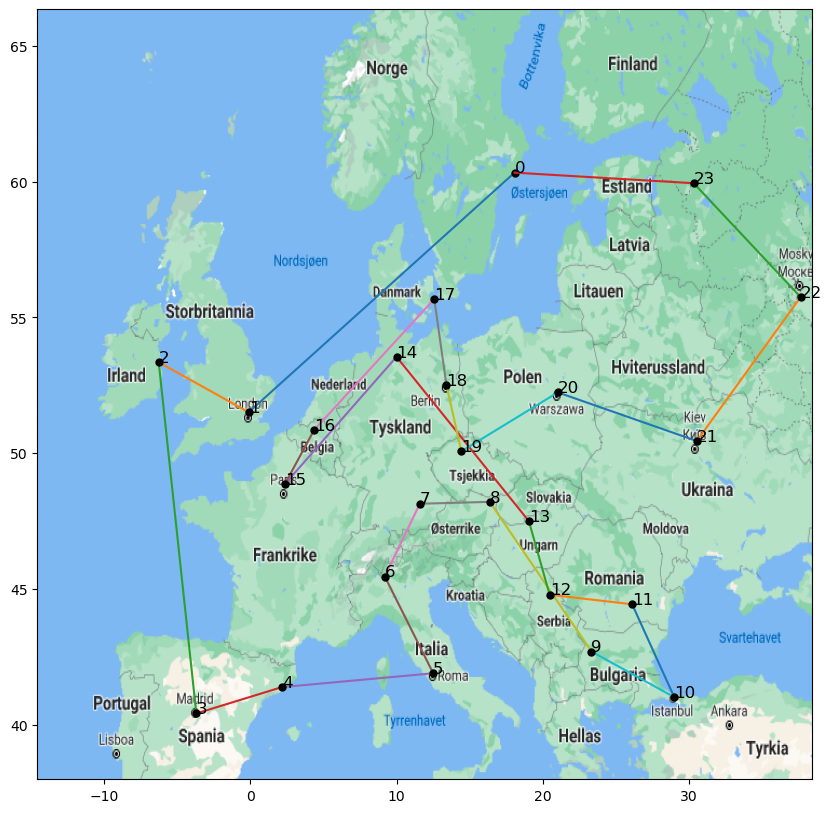

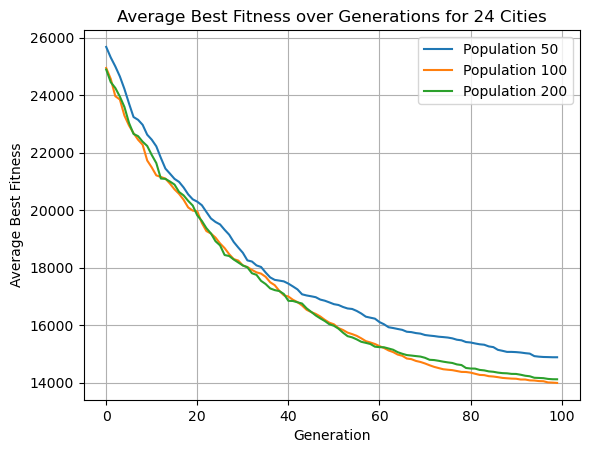

In [39]:
# Implement the algorithm here
def Genetic(n,populationSize, generations, mutation_rate):
    population= makePopulation(n,populationSize)
    population_with_fitness=evaluate_fitness(population)

    best_fitness_per_generation = []

    for generations in range(generations):
        parents=parentSelection(population_with_fitness,populationSize // 2)

        #crossover
        children=[]
        for i in range(0, len(parents), 2):
            if i + 1 < len(parents):
                child1 , child2 = crossover(parents[i], parents[i+1])
                children.append(child1)
                children.append(child2)

        #mutation
        for i in range(len(children)):
            if np.random.rand() < mutation_rate:
                children[i] = SwapMutation(children[i])
        
        childrenWithFitness = evaluate_fitness(children)
        combined=population_with_fitness+childrenWithFitness
        elites = survivorSelection(combined, populationSize)

        population_with_fitness= elites
        best_fitness_per_generation.append(min(population_with_fitness, key=lambda x: x[1])[1])

        #best =sorted(population_with_fitness, key=lambda x: x[1])
        #best_fitness_per_generation.append(best)
    
    test=sorted(population_with_fitness, key=lambda x: x[1])
    best= test[0]
    return best, best_fitness_per_generation



#makes an population of size with n cities
def makePopulation(n,size):
    population = []
    names = list(dis.keys())[:n]
    for _ in range(size):
        number = np.random.permutation(n).tolist()
        individual = [names[i] for i in number]
        population.append(individual)
    return population

#calculates fitness for every tour in the population
def evaluate_fitness(population):
    populationAndFitness = []
    for tour in population:
        fitness= total_distance(tour,dis)
        populationAndFitness.append((tour,fitness))
    return populationAndFitness

#Rank-based Selection
def parentSelection(populationAndFitness, selection_size):
    #sort the list bt the finess
    sorted_population = sorted(populationAndFitness, key=lambda x: x[1])

    #replace the finess with ranks (0 is worst and best is n-1)
    for i, (tour,rank) in enumerate(sorted_population):
        sorted_population[i] = (tour, len(populationAndFitness) - i- 1)
    
    #get probabilities of choosing each rank
    sumOfRank = sum(rank for tour, rank in sorted_population)
    probabilities = [rank / sumOfRank for tour, rank in sorted_population]
    
    #choose ranks based on probabilities
    ranksChosen = np.random.choice(range(len(sorted_population)), size=selection_size, p=probabilities, replace=False)
    selected = [sorted_population[tour][0] for tour in ranksChosen]

    return selected
    

#same as the neighbour swap in hillclimb
def SwapMutation (tour):
    city1= np.random.choice(np.arange(len(tour)))
    city2= np.random.choice(np.arange(len(tour)))
    
    if city1 != city2:
        swap =  tour[city1]
        tour[city1] = tour[city2]
        tour[city2] = swap

    return tour
    
#pmx
def crossover(parent1, parent2):
    n = len(parent1)
    child1 = [None] * n
    child2 = [None] * n

    # choose two crossover points
    start = np.random.randint(0, n - 1)
    end = np.random.randint(start + 1, n)

    # copy a segment from the parents to the children
    for i in range(start, end + 1):
        child1[i] = parent1[i]
        child2[i] = parent2[i]

    # fill in the remaining slots with the elements from the other parent
    for i in range(start):
        if parent2[i] not in child1:
            child1[i] = parent2[i]
        if parent1[i] not in child2:
            child2[i] = parent1[i]

    for i in range(end + 1, n):
        if parent2[i] not in child1:
            child1[i] = parent2[i]
        if parent1[i] not in child2:
            child2[i] = parent1[i]

    # resolve any None values that may have been left in the children
    for i in range(n):
        if child1[i] is None:
            for x in parent2:
                if x not in child1:
                    child1[i] = x
                    break
        if child2[i] is None:
            for x in parent1:
                if x not in child2:
                    child2[i] = x
                    break
    
    return child1, child2

#selectes the elites for the new population
def survivorSelection (lst,n):
    sort =sorted(lst, key=lambda x: x[1])
    population= sort[:n]
    return population



mutation_rate= 0.3 #30% of muatation
runs=20


def run_genetic_algorithm(n,population_size, generations):
    all_runs_best_fitness = np.zeros(generations)
    resultsGA = []
    total_time = 0
    

    for _ in range(runs):
        start_time = time.time()
        route, best_fitness_per_generation = Genetic(n, population_size, generations, mutation_rate)
        end_time = time.time()
        run_time = end_time - start_time
        total_time += run_time
        resultsGA.append(route)
        all_runs_best_fitness += np.array(best_fitness_per_generation)
    
    average_time = total_time / runs
    print("average time was", average_time)
    best24, worst24, mean24, std_dev24 = analyze_results(resultsGA)
    print("Best for", n ,"cities:", best24)
    print("Worst for", n ,"cities:", worst24)
    print("Mean for", n ,"cities:", mean24)
    print("Standard Deviation for", n ,"cities:" , std_dev24)
    plot_plan(resultsGA[-1][0])

    average_best_fitness = all_runs_best_fitness / runs
    return average_best_fitness, resultsGA




run_genetic_algorithm(10,100,50)


generations=100
print("")

print("Population 50:")
avg_fitness_50, resultsGA_50 = run_genetic_algorithm(24,50,generations)
print("")
print("Population 100:")
avg_fitness_100, resultsGA_100 = run_genetic_algorithm(24,100,generations)
print("Population 200:")
avg_fitness_200, resultsGA_200 = run_genetic_algorithm(24,100,generations)


plt.plot(avg_fitness_50, label="Population 50")
plt.plot(avg_fitness_100, label="Population 100")
plt.plot(avg_fitness_200, label="Population 200")
plt.xlabel("Generation")
plt.ylabel("Average Best Fitness")
plt.title("Average Best Fitness over Generations for 24 Cities")
plt.legend()
plt.grid(True)
plt.show()




### Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course):

Answer:

We can see for the different population sizes that there is a big difference from the 50 in population to the 100 and 200, that are closer in distances. Surprisingly the 100 in population size got the shortest route. We can see form the curve that the 100 and 200 was close until generation 65, where the 100 in population size got a big advantage. From there it got closer until the end, but the 100 in population size got the shortest route.

I also tried different mutation rates, but I found that around 0.3 was the best for my genetic algorithm.



Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [41]:
# Answer

# Yeah, my GA found the shortest tour with a population size of 100 in 50 generations.

# My GA used an average of 0.063 seconds for 10 cities, compared to the exhaustive search that used 4.86 seconds
#For 24 cities my GA used an average of around 0.18 with population sizes of 100 and 200.

# For 10 cities the GA with a population size of 100 and 50 generations, it would inspect around 3350.
# 100 for initial population, 50 children and around 15 mutations per generation.
# The exhaustive search inspects 10!


## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [12]:
# Implement algorithm here